## Stefenie Pickston

### 1506427

In [1]:
# PRE-WRITTEN CONTENT
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv


In this next section we are going to load the data, and use a line of code pre-written above. We know it will load the correct file because the file path and name is printed out. 

In [2]:
# Load Data
df = pd.read_csv (os.path.join(dirname, filename))
# Check 
print('Loaded...')

Loaded...


We are now going to perform that the dataset has been loaded correctly by checking its information and looking at the head (first 6 lines) of the file. 

In [3]:
# Get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
# Look at the head of the file to check the data seems correct. 
df.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


Now we want to visualise the dataset by way of plotting it. We are going to be using a pairplot. 

#### Visualising the Data

In [5]:
# Required importing of libraries. 
import seaborn as sns

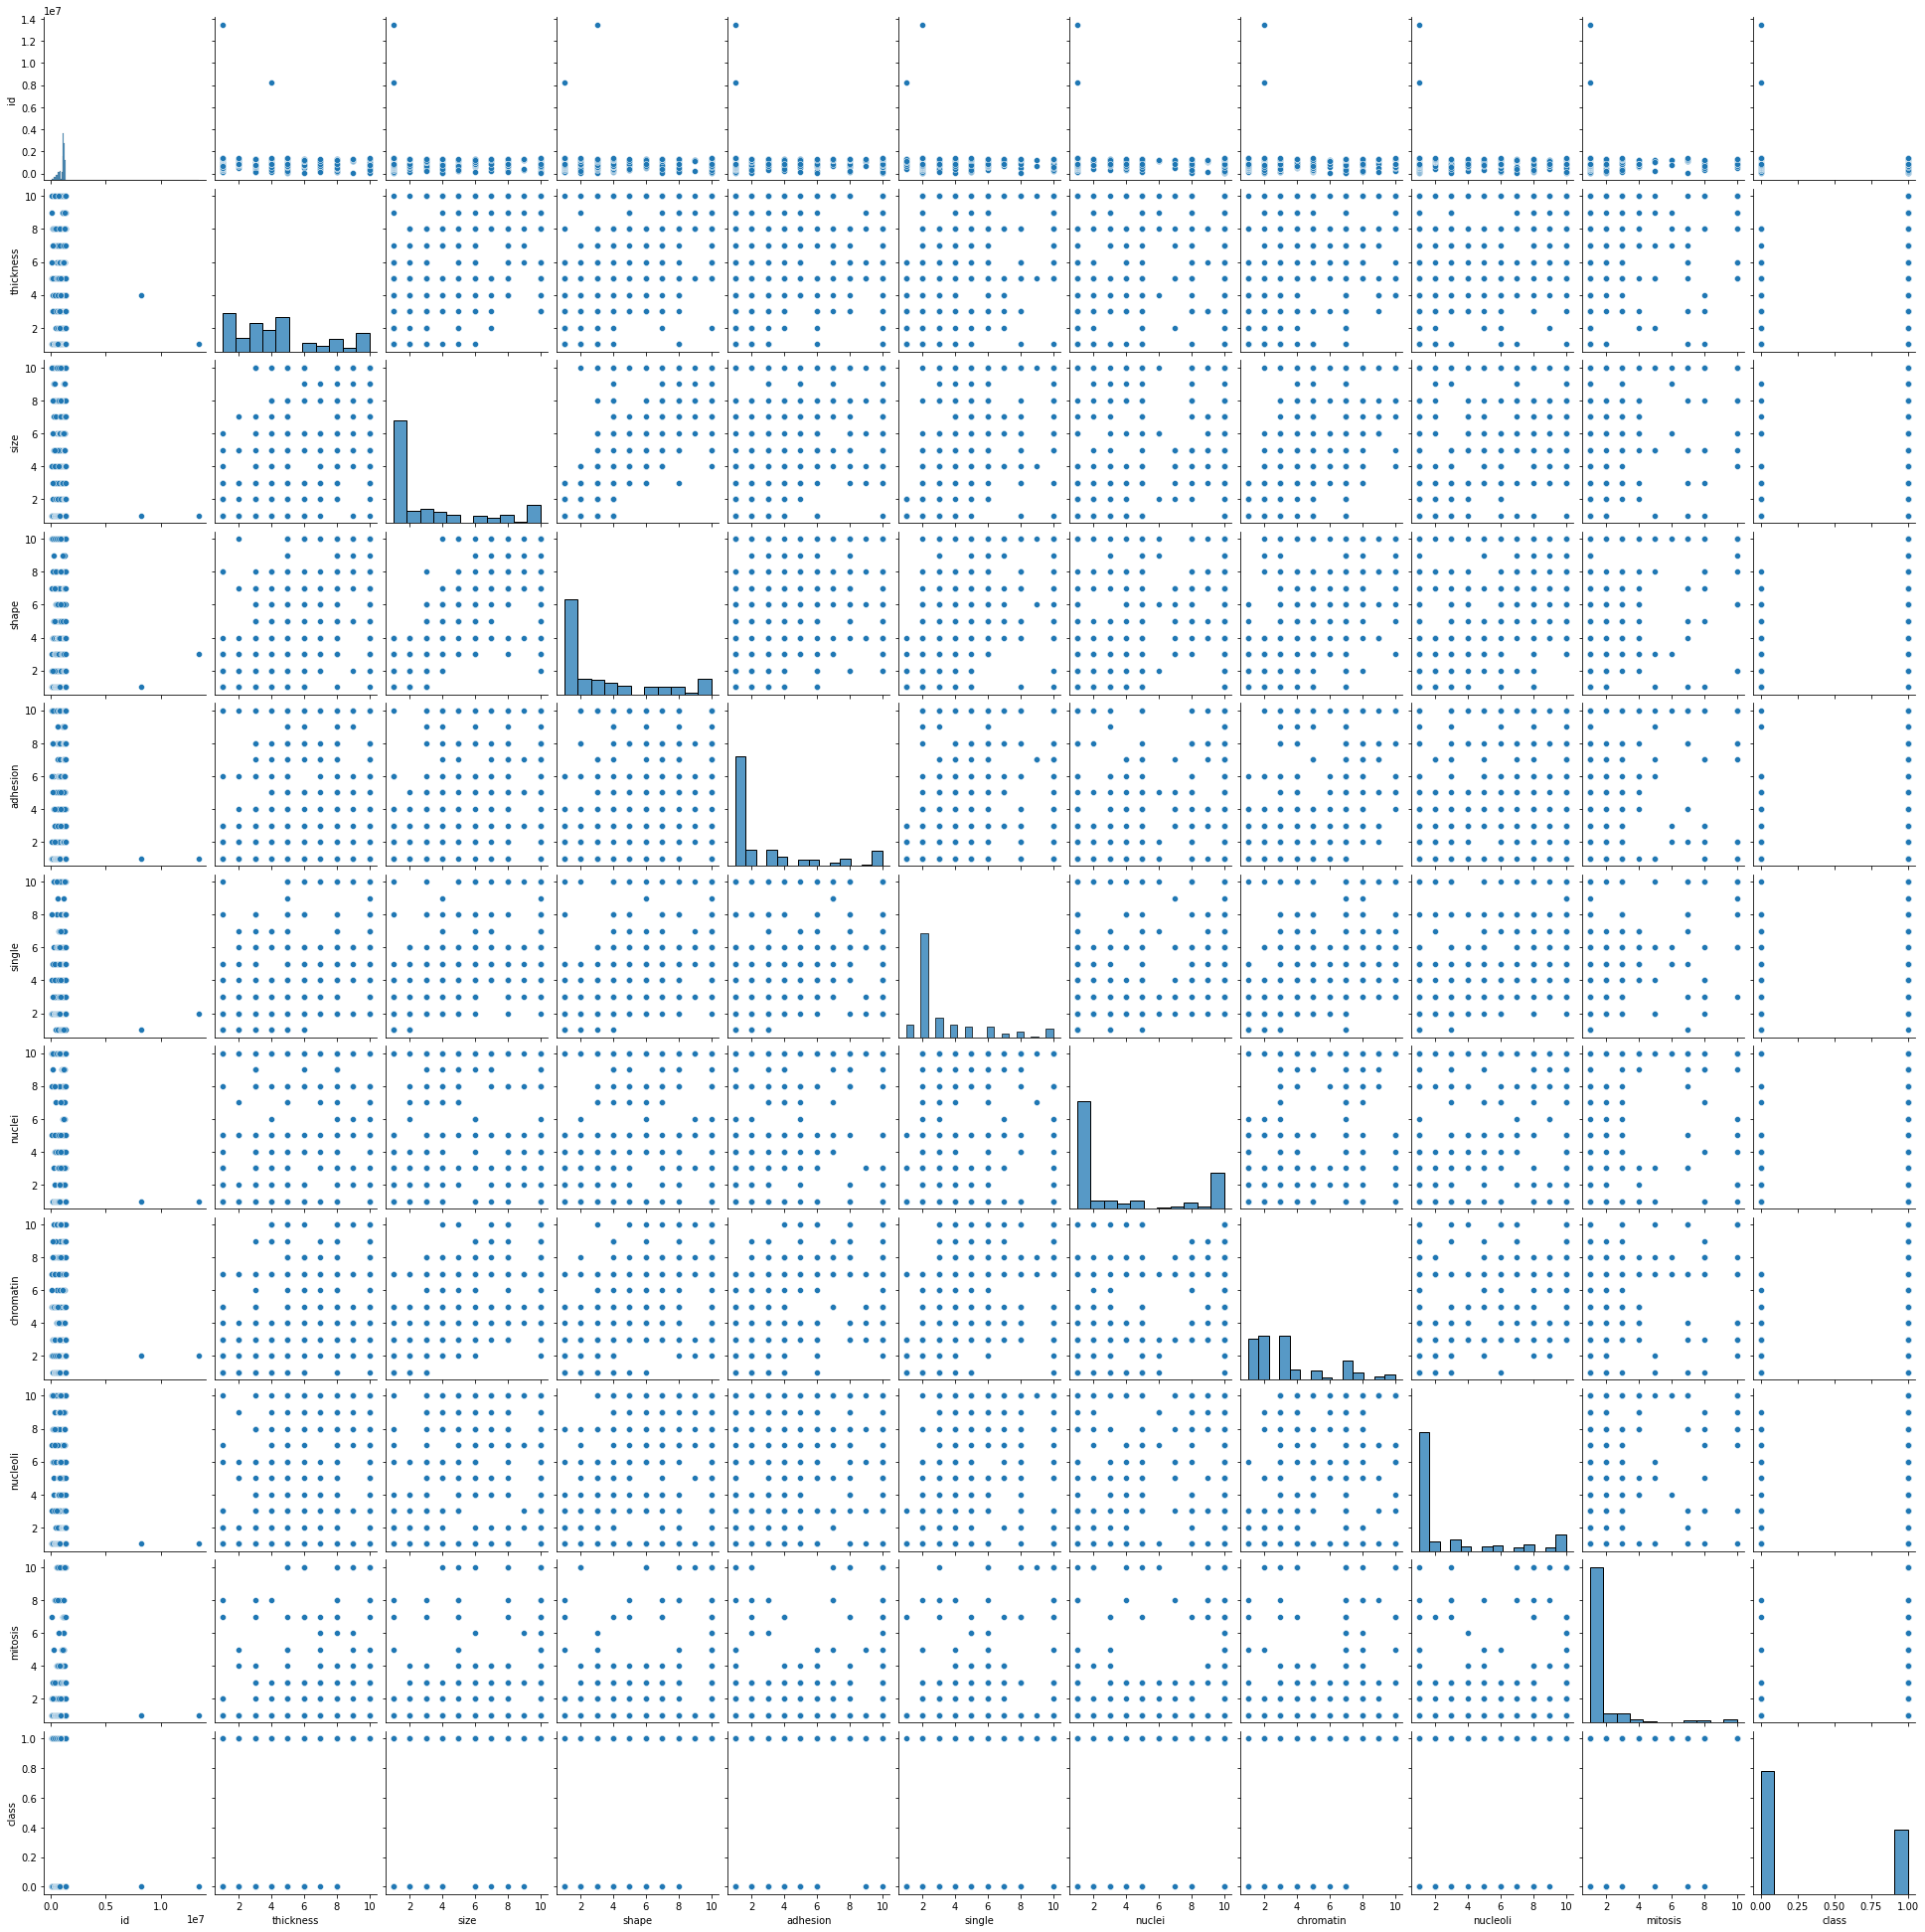

In [6]:
# Create a pairplot of the data (basic)
plot = sns.pairplot(data=df)

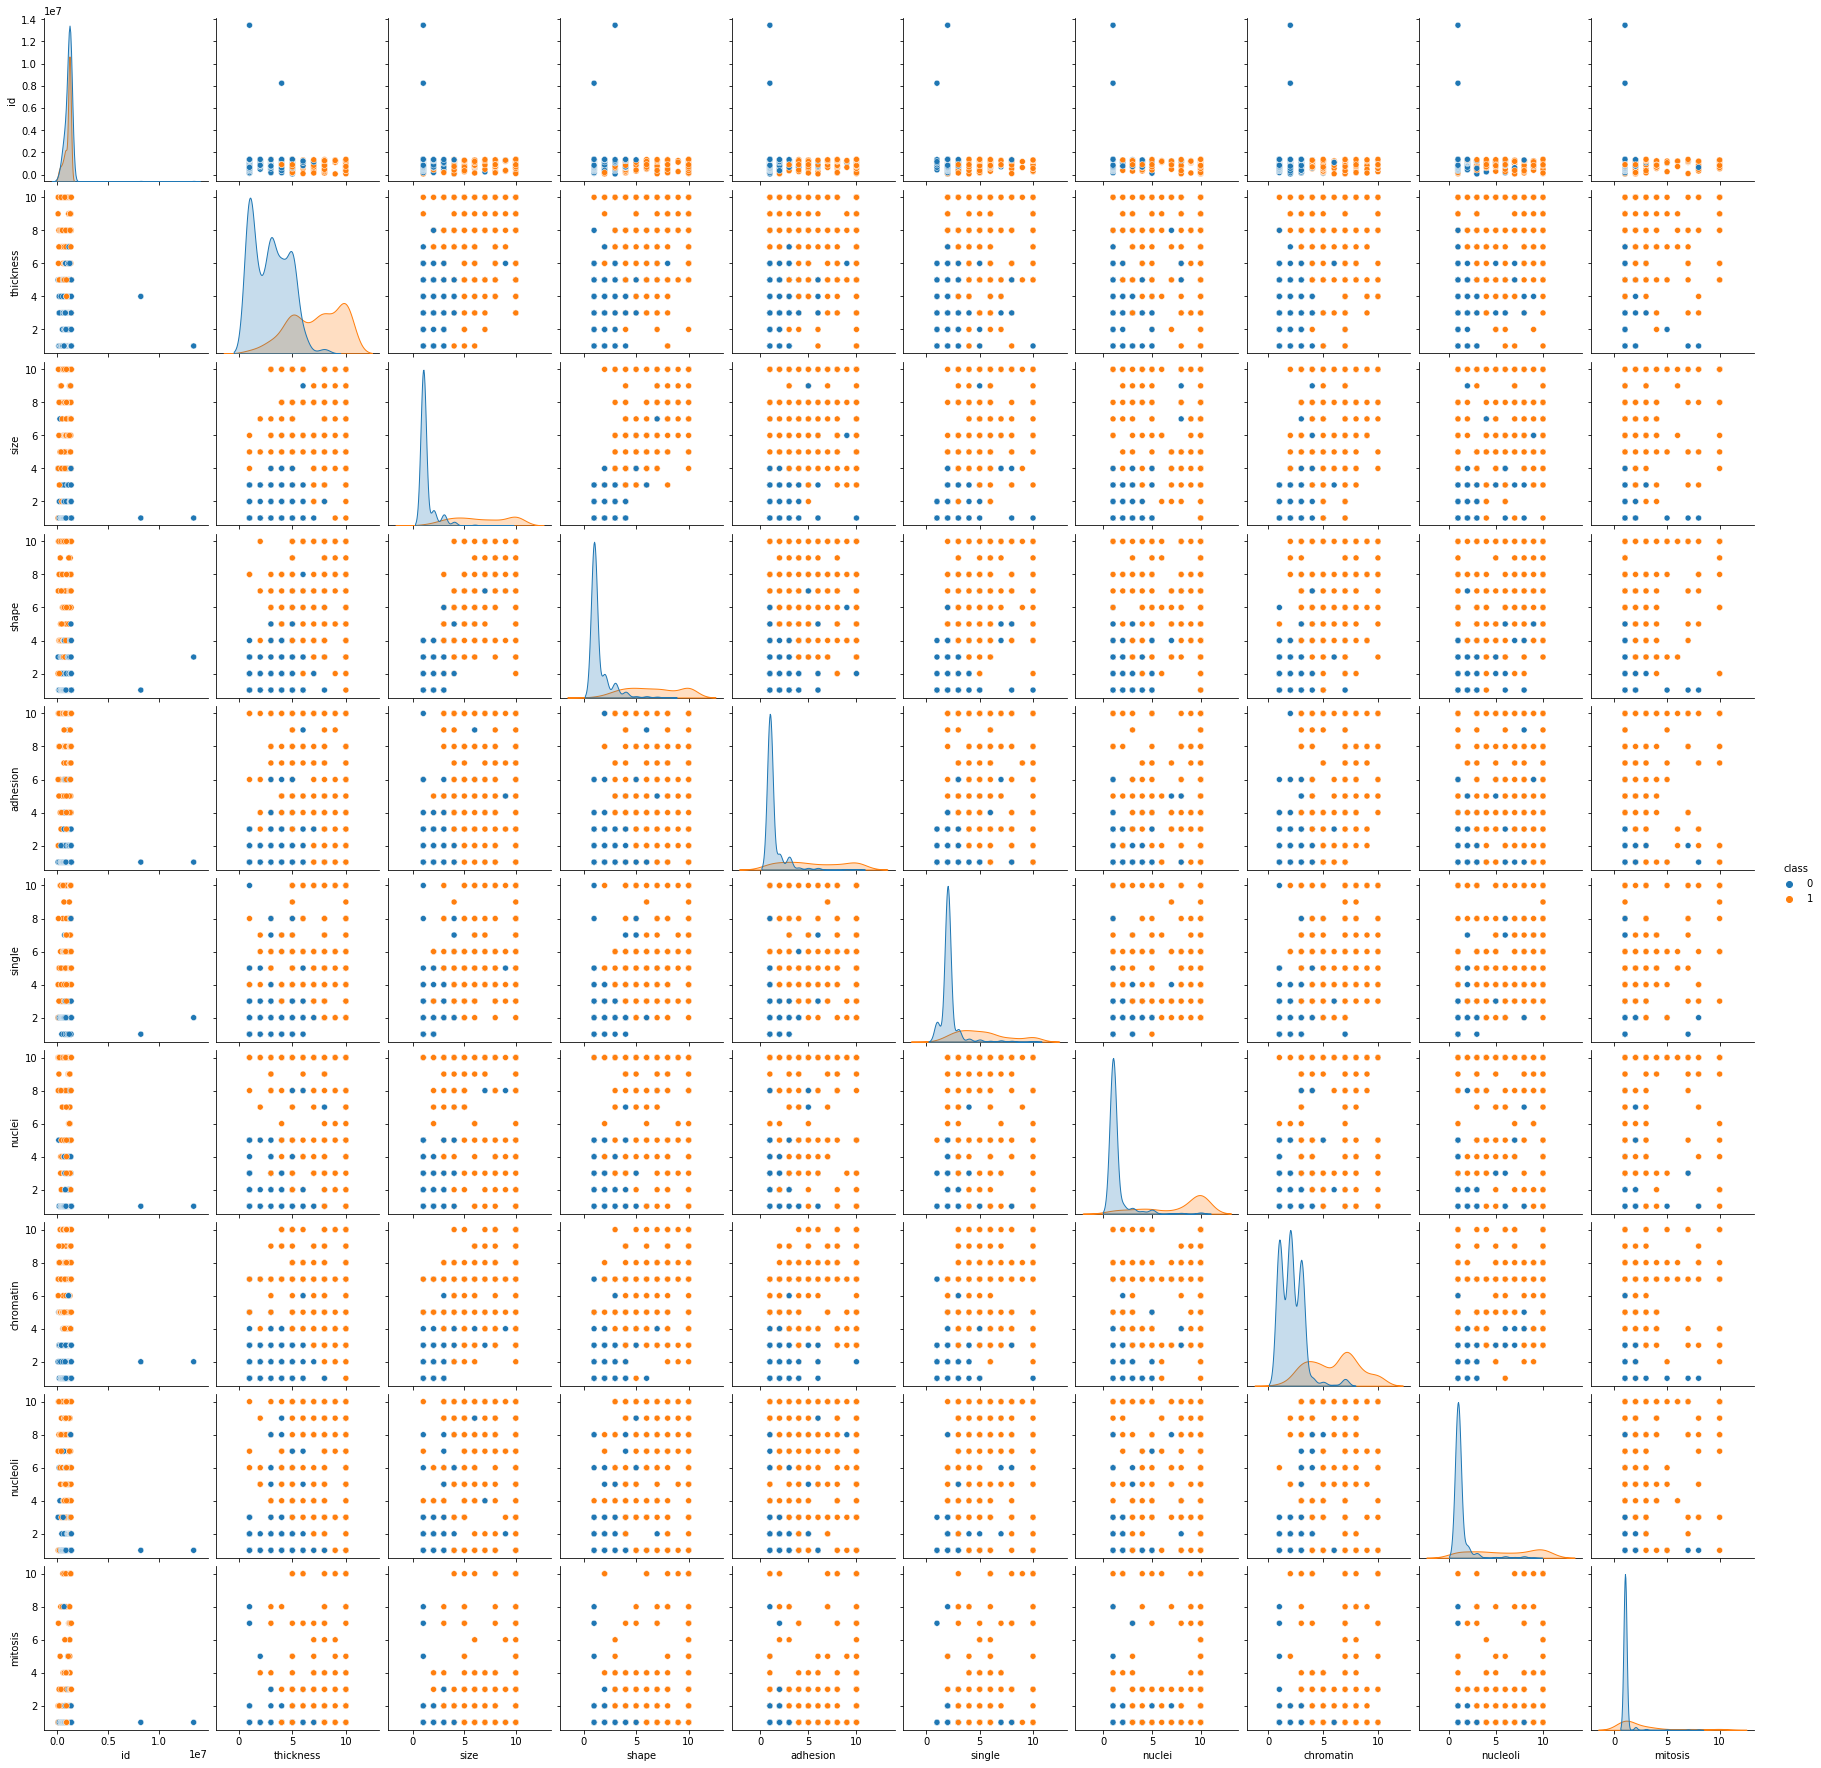

In [7]:
# Create a pairplot with different colours for further analysis. 
coloured_plot = sns.pairplot(data = df, hue = "class")

We can see from the visualisation of the data, that there is some overlap between the two classes, this could mean that our classifier may not be entirely accurate as the classes have features that seem to nto be able to provide a clear distinction between the classes alone. 

Now we are going to split the dataset into a training and test (validation) sets. 

#### Classifying the Dataset

Firstly we need to ensure there are no null values or missing values from the dataset. 

In [8]:
df = df.fillna(0)

In [9]:
# Required importing of libraries
from sklearn.model_selection import train_test_split

We are going to have to split the dataset into two variables X and Y. We have counted that there are 10 variables in the dataset, therefore the variable X will be the first 9 variables, and the variable Y will be the last variable observed (class). 

In [10]:
# Get X and Y variables. 
x = df.iloc[:, 1:10]
y = df.iloc[:, 10]
# Check Class is selected for Y. 
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

In [11]:
# Split the dataset according to assignment spec.
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 1506427)
# Check
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(559, 9) (140, 9) (559,) (140,)


Now that we have split the dataset, we can train a SVC classifier (on the training set). This model (classifier) will be used to predict the test set. 

In [12]:
# Required importing from libraries
from sklearn.svm import SVC
# Creating and training the classifier
model=SVC().fit(x_train, y_train)
print('Classifier Trained...')

Classifier Trained...


In [13]:
# Predicting using the classifier previously made.
predictions = model.predict(x_test)
print(predictions[:9])
y_test[:9]

[1 0 0 0 0 0 0 1 0]


353    1
397    0
8      0
542    0
341    0
596    0
378    0
604    1
538    0
Name: class, dtype: int64

Now we are going to generate a classification report and confusion matrix. 

#### Classification Report

In [14]:
# Required importing of libraries
from sklearn.metrics import classification_report

In [15]:
# Generate and print the classification report.
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.96      0.98        49

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



#### Confusion Matrix

In [16]:
# Required importing of libraries
from sklearn.metrics import confusion_matrix

In [17]:
# Generate and print the confusion matrix. 
confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[91  0]
 [ 2 47]]
